### **numpy**, **SciPy stats** and **matplotlib** modules  
The **numpy** and **SciPy stats** and **matplotlib** modules have many mathematical  
and statistical methods used in **Data Science** and **Machine Learning**  

Given a collection of numeric values, such as a list, we can compute:

- **mean** - the average value (numpy)
- **median** - the mid-point value (numpy)
- **mode** - the most frequent value (stats)
- **standard deviation** - how far a value is from the mean (numpy)
- **variance** - standard deviation squared (numpy)

We can also generate numpy arrays of *random* numeric values.
- **random.uniform** generates random, *uniform* (even) distribution of values
- **random.normal** generates random, *normal* (bell curve shaped) distribution of values

**matplotlib is for plotting data**
- **histogram** shows **frequency distribution** of values: **plt.hist()**   
random **uniform** and **normal** distributions can be plotted as a histogram. (matplotlib)
- **scatter plot** shows  individual points in **(x,y) space**, as dots:  **plt.scatter()**
- **line plot** shows lines in **(x,y) space**: **plt.plot()**
- **linear regression** shows **best-fit / trend** lines.  
given **x** or **y**, we can *predict* the other value by plotting it on the regression line.

In [144]:
# 1. connect to Google Drive


In [145]:
# install libraries if needed:
%pip install matplotlib scipy pandas IPython


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [146]:
# 2. import libraries
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from IPython.display import Image
from scipy import stats

In [147]:
# 3. set the base URL (the path that is the same for
# all items loaded from Google Drive)

In [148]:
car_df = pd.read_csv('../csv/Car_sales.csv')

In [149]:
print(car_df.shape) # (157, 16)
car_df.head() # rows 1-5

(157, 16)


,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639


In [150]:
# loc vs iloc: loc takes col names and index names
# with loc end name is NOT exclusive -- it is INCLUSIVE
# using loc, get the first 3 rows first 3 cols (3x3 in the upper left corner)
car_df.loc[:2, "Manufacturer":"Sales_in_thousands"]

,Manufacturer,Model,Sales_in_thousands
0,Acura,Integra,16.919
1,Acura,TL,39.384
2,Acura,CL,14.114


In [151]:
# challenge : same as above, but with iloc instead of loc
car_df.iloc[:3, :3]

,Manufacturer,Model,Sales_in_thousands
0,Acura,Integra,16.919
1,Acura,TL,39.384
2,Acura,CL,14.114


In [152]:
# challenge : same as above, with both .loc and .iloc versions
# BUT get the lower RIGHT 3x3
# first the .loc version:
car_df.loc[154:156, "Fuel_efficiency":"Power_perf_factor"]

,Fuel_efficiency,Latest_Launch,Power_perf_factor
154,25.0,6/25/2011,71.155978
155,23.0,4/26/2011,101.623357
156,24.0,11/14/2011,85.735655


In [153]:
# challenge : same as above, with both .loc and .iloc versions
# BUT get the lower RIGHT 3x3
# then the .iloc version:
car_df.iloc[-3:, -3:]

,Fuel_efficiency,Latest_Launch,Power_perf_factor
154,25.0,6/25/2011,71.155978
155,23.0,4/26/2011,101.623357
156,24.0,11/14/2011,85.735655


In [154]:
# make a list of just the column names
car_df_cols_list = list(car_df.columns)
print('car_df_cols_list:\n', car_df_cols_list)
# get the length (num rows)
num_rows = len(car_df.index)
print('num_rows:', num_rows)

car_df_cols_list:
 ['Manufacturer', 'Model', 'Sales_in_thousands', '__year_resale_value', 'Vehicle_type', 'Price_in_thousands', 'Engine_size', 'Horsepower', 'Wheelbase', 'Width', 'Length', 'Curb_weight', 'Fuel_capacity', 'Fuel_efficiency', 'Latest_Launch', 'Power_perf_factor']
num_rows: 157


In [155]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         157 non-null    object 
 1   Model                157 non-null    object 
 2   Sales_in_thousands   157 non-null    float64
 3   __year_resale_value  121 non-null    float64
 4   Vehicle_type         157 non-null    object 
 5   Price_in_thousands   155 non-null    float64
 6   Engine_size          156 non-null    float64
 7   Horsepower           156 non-null    float64
 8   Wheelbase            156 non-null    float64
 9   Width                156 non-null    float64
 10  Length               156 non-null    float64
 11  Curb_weight          155 non-null    float64
 12  Fuel_capacity        156 non-null    float64
 13  Fuel_efficiency      154 non-null    float64
 14  Latest_Launch        157 non-null    object 
 15  Power_perf_factor    155 non-null    flo

In [156]:
# a bit more dataframe practice:
# drop, move and rename cols
car_df.drop(columns="__year_resale_value", inplace=True)
# a.) drop "__year_resale_value" (missing a lot of data)
# "__year_resale_value"

In [157]:
print(car_df.shape) # (157, 15)
car_df

(157, 15)


,Manufacturer,Model,Sales_in_thousands,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Volvo,V40,3.545,Passenger,24.40,1.9,160.0,100.5,67.6,176.6,3.042,15.8,25.0,9/21/2011,66.498812
153,Volvo,S70,15.245,Passenger,27.50,2.4,168.0,104.9,69.3,185.9,3.208,17.9,25.0,11/24/2012,70.654495
154,Volvo,V70,17.531,Passenger,28.80,2.4,168.0,104.9,69.3,186.2,3.259,17.9,25.0,6/25/2011,71.155978
155,Volvo,C70,3.493,Passenger,45.50,2.3,236.0,104.9,71.5,185.7,3.601,18.5,23.0,4/26/2011,101.623357


In [158]:
car_df_cols_list = list(car_df.columns)
print('car_df_cols_list:\n',car_df_cols_list)

# b.) move 'Wheelbase' to be between 'Length and 'Curb_weight'
# get the index of 'Curb_weight' col so that we know where to insert 'Wheelbase'; list.index(item) returns the numeric position (index) of the item in the list
curb_wt_index = car_df_cols_list.index('Curb_weight')
print('curb_wt_index:',curb_wt_index) # 10

car_df_cols_list:
 ['Manufacturer', 'Model', 'Sales_in_thousands', 'Vehicle_type', 'Price_in_thousands', 'Engine_size', 'Horsepower', 'Wheelbase', 'Width', 'Length', 'Curb_weight', 'Fuel_capacity', 'Fuel_efficiency', 'Latest_Launch', 'Power_perf_factor']
curb_wt_index: 10


In [159]:
# popped_col = df.pop(col_name) to pop (remove) the col that we want to move
popped_wheelbase_col = car_df.pop('Wheelbase')
print('popped_wheelbase_col:\n',popped_wheelbase_col[:5])

popped_wheelbase_col:
 0    101.2
1    108.1
2    106.9
3    114.6
4    102.6
Name: Wheelbase, dtype: float64


In [160]:
# get fresh values since we have removed a column:
car_df_cols_list = list(car_df.columns)
curb_wt_index = car_df_cols_list.index('Curb_weight')

In [161]:
# insert the popped wheelbase series as col data at new index (10):
# df.insert(index,col_name,data)
# "Wheelbase"
car_df.insert(curb_wt_index,"Wheelbase",popped_wheelbase_col)

In [162]:
print(car_df.shape)
car_df.head()

(157, 15)


,Manufacturer,Model,Sales_in_thousands,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Width,Length,Wheelbase,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,Passenger,21.50,1.8,140.0,67.3,172.4,101.2,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,Passenger,28.40,3.2,225.0,70.3,192.9,108.1,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,Passenger,NaN,3.2,225.0,70.6,192.0,106.9,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,Passenger,42.00,3.5,210.0,71.4,196.6,114.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,Passenger,23.99,1.8,150.0,68.2,178.0,102.6,2.998,16.4,27.0,10/8/2011,62.777639


In [163]:
# c.) rename 'Power_perf_factor' as 'Power_Performance'
# 'Power_perf_factor'
car_df.rename(columns={'Power_perf_factor':'Power_Performance'}, inplace=True)

In [164]:
print(car_df.shape)
car_df.head()

(157, 15)


,Manufacturer,Model,Sales_in_thousands,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Width,Length,Wheelbase,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_Performance
0,Acura,Integra,16.919,Passenger,21.50,1.8,140.0,67.3,172.4,101.2,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,Passenger,28.40,3.2,225.0,70.3,192.9,108.1,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,Passenger,NaN,3.2,225.0,70.6,192.0,106.9,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,Passenger,42.00,3.5,210.0,71.4,196.6,114.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,Passenger,23.99,1.8,150.0,68.2,178.0,102.6,2.998,16.4,27.0,10/8/2011,62.777639


In [165]:
# 4. declare a list of numbers and find their min and max:
# 77,66,72,88,90,56,91,82,90,101,75,63,70,83, 95, 95, 74, 48, 92
print() # 19
print('minimum degrees:') # 48
print('maximum degrees:') # 101

# np.argmin(list) returns the index of the min value in a list
print('index of minimum degrees:') # 17
# np.argmax(list) returns the index of the max value in a list
print('index of maximum degrees:') # 9


minimum degrees:
maximum degrees:
index of minimum degrees:
index of maximum degrees:


In [166]:
# 4B. get the min / max / mean of the df's Horsepower col:
print('Horsepower') # 55.0
print('Horsepower') # 450.0
print('Horsepower') # 186

Horsepower
Horsepower
Horsepower


In [167]:
# 5. find the mean (average) and median value of the degrees list:

print('mean_deg:') # 79.4


print('med_deg:') # 82.0

# 6. median is middle value, which you get if you sort the list

print('degrees_fahr:') # median is the value in the middle of sorted nums

mean_deg:
med_deg:
degrees_fahr:


The **mode** method returns a **tuple**, which is immutable collection of numeric values in parentheses **()**.  
The **ModeResult** tuple contains two values:   
- the **mode** value itself, and
- the **count** (number of occurrences) of the mode.

The tuple items can be accessed by index: 0 and 1:

In [168]:
# 7. find the mode (most frequently occurring) deg:
# if there's a tie, it takes the first one (from sorted list)
# add 3 90's to the list

print('degrees_fahr:')

print('mode_degrees_fahr:') # ModeResult(mode=90, count=5)
# get the mode value and frequency from the tuple:

print('mode_value:') # 90

print('mode_freq:') #

degrees_fahr:
mode_degrees_fahr:
mode_value:
mode_freq:


**standard deviation** is a measure of how far a value is from the mean.
- In **normal distribution** most values cluster around the mean.
- This can be shown by a symmetrically graph called a **bell curve**
- On a bell curve of normal distribution:
  - 68.2% of all values are within 1 standard deviation, plus or minus, of the mean.
  - 95.4% of all values are within 2 standard deviations, plus or minus, of the mean.
  - 99.8% of all values are within 3 standard deviations, plus or minus, of the mean.

The standard deviation of the **temperature** list would be that value which,  
if added or subtracted from the mean, would give a value that is 1 standard deviation away from the mean.  
The standard deviation unit is **Sigma: σ**.

In [169]:
# 9. Load the bell curve image by concatentating it onto the base url
# and then displaying it:
#  "bell-curve-standard-deviation.png"

In [170]:
# 10. Find the standard deviation of the temperature:

print('degs_std:') # 13.546674746749288

degs_std:


- The **standard deviation** of the **degrees** list is around 14 degrees
- The **mean degrees** is **79** ish
- 68.2% of all degrees are within 1 standard deviation of the **degrees**.
- Therefore, 68.2% of all degrees are in the 65 to 93 range

The **variance** is the square of **standard deviation**.  
The variance unit is **Sigma: σ2** (sigma squared)

In [171]:
# 11. Find the variance of the temperature:

print('degs_var:') # 197.0747922437673
print() # std squared is variance

degs_var:



**percentile** is the percent of values in a collection of numbers that are lower than a given number.
- **np.percentile(list,pct_cut_off)**

In [172]:
# call df.describe() for stats on numeric cols
# includes min, max, mean, std, pct (75,50,25)
# car_

In [173]:
# get the degree number that 75% of all the degrees are less than

print('pctile_75:') # 90.0
# (so 75% of all the degrees are less than 90)

# get the degree number that 25% of all the degrees are less than]

print('pctile_25:') # 72.5

# get the degree number that 95% of all the degrees are less than]

print('pctile_95:') # 95.0

# get the degree number that 5% of all the degrees are less than]

print('pctile_5:') # 56.35

pctile_75:
pctile_25:
pctile_95:
pctile_5:


In [174]:
# CHALLENGE: Declare a list of people's ages:
# 5,31,43,48,50,41,7,11,15,39,80,82,32,2,8,6,25,36,27,61,31

In [175]:
# 14. Make an input box for entering a percentile and getting back the age
#.    at which that percent of people are younger:
# "Enter Percentile, Get Age: "

print('% of all ages are less than ')
# some values to try:
# input 40, get:
# 90% of all people are less than 61.0
# 80% of all people are less than 48.0
# 70% of all people are less than 41.0
# 40% of all people are less than 27.0
# 35% of all people are less than 25.0
# 30% of all people are less than 15.0
# 20% of all people are less than 8.0
# 10% of all people are less than 6.0

% of all ages are less than 


- **random.randint(min,max)** - gives one random integer in min-max range
- **random.sample(range(min,max),count)** - gives a list of unique min-max integers; list length = count

In [176]:
# small range to prove that max is inclusive
print('r:')

r:


**for loop vs while loop**: when to use one or ther other
- **for loop** when you know the exact number of iterations (such as looping a range of numbers or a list)
- **while loop** when you do NOT know the exact number of iterations (such as going until you find something or meet some condition)

In [177]:
# for loop is for when you know exactly how many times loop will run
# this could be for looping a range of nums:
# for

In [178]:
# OR: for loop could be for looping a list from start to end:
# 'apple','banana','cherry','grape','kiwi'
# fo

In [179]:
# while loop runs an unknown number of times -- stops when a condition is met
# generate a rand int from 1-100 until you get a number divisible by 5
# such as: 5,10,15,,,85,90,95,100
# r
# while r is NOT evenly divisible by 5
# while condition must be True for loop to run
# wh

In [180]:
# challenge: generate a Powerball Lottery ticket as a list
# consisting of 5 unique numbers from 1-69 in ascending order
# followed by (last item) a number from 1-26 (Powerball number)
# hint: use random.sample(range(min,max),count)
# example result: [5,11,23,24,45,23]

print('lottery_ticket:')

lottery_ticket:


**numpy.random.uniform(min,max,sample_size)**

In [181]:
# 15. Make a uniform numpy array of 600 random floats between 0 and 6:
# rand_
print('rand_600[:60]:\n')

rand_600[:60]:



**histogram** shows **frequency distribution** -- how many items fall within specified ranges.  

Each range, called a **bin**, is visualized as a column.

**uniform distribution** is when all values are more or less uniformly distributed, as by random.  
The greater the sample size, the more even the distribution.
**plt.hist(x,bins)**

In [182]:
# 16. Make a histogram of the rand_floats. Since the values
#.    were generatead by random.uniform, there should be
#.    100 items, give or take, in each of 6 bins. However,
#.    due to the very small sample size, the bins will have
#.    very different heights:
# plt
# 'Roll of the Dice: 600 times (one die)'
# 'Dice Result'
# 'Count'
# plt

In [183]:
# similar to above but without ranges -- just 600 ints from 1,6 at random
# then just bar chart
# rand_6

In [184]:
# plot the rolls of the dice as bars.. don't need histogram bins
# cuz these values are not ranges

# Count occurrences of each face
# unique_values, num_of_each = np.unique(list_of_nums, return_counts=True)
# val

# Plot bar chart
# ba

# 'Roll of the Dice: 600 times (one die)'
# 'Dice Result'
# 'Count'

# add the values to each bar
# add vertical space to show the bar values
# use enumerate() to gain access to the index of each bar as you loop

  # output text count label for each bar in x,y space
  # plt

# plt

In [185]:
# 17. Repeat the previous two steps, but this time with 60K items:
# rand_6
print()

In [186]:
# val

# Plot bar chart
# ba

# 'Roll of the Dice: 60,000 times (one die)'
# 'Dice Result'
# 'Count'

# add the values to each bar
# add vertical space to show the bar values
# use enumerate() to gain access to the index of each bar as you loop

  # output text count label for each bar in x,y space




- **normal distribution** is when values tend to cluster around the mean, as in a **bell curve**.
- **numpy.random.normal(mean, standard_deviation, number_of_values)**

In [187]:
# 18. Make a normal distribution of 1,000 test scores that have an average value
#.    of 100 and a standard deviation of 15 (that is, 68.2% of values will be
#.    within the 85-115 range). Plot the result as a histogram of 20 bins

# print(test_scores_1000[:30])
# pl

# the result is a jaggy bell curve -- not enough bins and too small a sample size


In [188]:
# 19. Plot a 250,000 with the same mean (100) and standard deviation (15).
#.    Increase bins to 200. The resulting bell curve will be much smoother:
# "Test Score Bell Curve Normal Distribution"

# 'min test score:'
print('max test score:',)
print('98% percentile score:')
print('99.9% percentile score:')
print('99.99% percentile score:')

max test score:
98% percentile score:
99.9% percentile score:
99.99% percentile score:


In [189]:
# 20. Make 500 x values with a mean of 100 and a std of 15:

print('x:')
# make 500 y values to go with the x values: same mean and std:

print('y:')

x:
y:


In [190]:
# 21. Plot the 50,000 dots
# "50,000 random, normally distributed dots of mean 100 and std 15"

# the dots cluster like a bullseye right around the two averages: (100,100)

**regression** is used to *predict* the relationship between variables:  
in terms of **(x,y)** points: given just **x**, we may be able to predict **y** --  *if* we have some existing **(x,y)** points to study first.

**linear Regression** uses the relationship between known data-points to draw a straight line through all them.
- the **regression line**, also called the **best fit** line, minimizes the distance from the line to *all* points
- more specifically, the best fit line minimizes the **sum of the squares** of all the distances from the dots to the line, and is sometimes called the **least squares line**

This line can be used to predict future values.

In [191]:
# 22. output the regression best fit line image:
# a 4-pack showing what the regression line is and and how it is drawn:
# 'regression-best-fit-line.jpg'

In [192]:
# 23. Make some x-y values of ballbame attendance and concession stand revenue
# in general, the greater the attendance, the greater the revenue, BUT
# how can we predict revenue given only an attendance number

# 25678,22455,17796,18098,27029,22342,19453,32089,29089,31024,15190,32454,24033,26343

# make sure the two lists have the same number of values -- a scatterplot requirement:

# 750202,632144,593234,502243,730343,753433,534934,800242,779908,848403,430989,874977,629385,743086

print()
print()

In [193]:
# challenge: make a 2-col dataframe using the 2 lists
# att

In [194]:
# "Attendance"
# "Concessions"

In [195]:
print() # (14, 2)


- **vector operations** doing math between corresponding items in 2+ cols

In [196]:
# "Avg Sales" "Concessions" "Attendance"
#  add a new col: "Avg Sales" (rounded to int)


In [197]:
print(attendace_concessions_df.shape)
attendace_concessions_df.head()

NameError: name 'attendace_concessions_df' is not defined

**y = mx + b** is the formula for the slope of a line.
- if you have any 3 of the four values, you can solve for the missing one
- **y** is concessions revenue, which is what we want to predict for a given attendance (x value)
- so, we use the linregress method to get the slope and y-intercept,  
plug those into the formula along with x, and in that way solve for y

concessions_25K_fans: 697119
attendance_1M_revenue: 38437


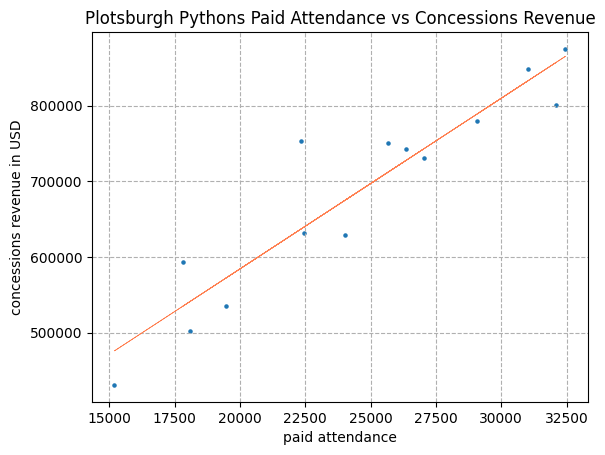

In [ ]:
# 24. plot attendance vs concessions as a scatterplot
#     and on top of that, add the regression line

# "Plotsburgh Pythons Paid Attendance vs Concessions Revenue"


# we get a strong positive correlation between attendance and concessions revenue,
# as expected; next we'll draw a regression line through the dots
# m # m, b used for finding x or y
# in terms of the other via the famous equation y = mx + b

# drawing regression line requires numpy arrays for x values -- plain list won't work


# predict concessions for 25000 attendance

print('concessions_25K_fans:') # 697119

print('attendance_1M_revenue:') # 697119


In [ ]:
# predict concessions based on attendance:
# given x, look up y
# 25000 fans -- what's the concesssions ??
# x_
# y_


In [ ]:
# 28. Define a function that takes in an an attendance figure,
#     as x, plugs and returns the y-value, which is concessions:
# de
  # calculate y using y=mx + b formula, and return y:
  # ret

In [ ]:
# try the function: enter an attendance (fans_num), get the answer
# sale
print()